# AI Seminar Practical Test 





**Συμπληρώστε παρακάτω τα στοιχεία σας:**

**Επώνυμο: Πηγαδάς**

**Όνομα: Νικόλαος**

**Σχολή: ΣΗΜΜΥ ΕΜΠ**

**Α.Μ.: 03118445**



### Ζητούμενα - Οδηγίες
Καλείστε να χρησιμοποιήσετε τον αλγόριθμο **k-Means ** για την μη επιβλεπόμενη **συσταδοποίηση / ομαδοποίηση (clustering)** κρασιών με βάση φυσικοχημικά δεδομένα ανάλυσης. Θα χρησιμοποιήσετε το Wine Data Set του UCI Machine Learning Repository. Αυτά τα δεδομένα είναι τα αποτελέσματα μιας χημικής ανάλυσης κρασιών που καλλιεργούνται στην ίδια περιοχή στην Ιταλία αλλά προέρχονται από τρεις διαφορετικές ποικιλίες. Η ανάλυση προσδιόρισε τις ποσότητες 13 συστατικών που βρέθηκαν σε καθένα από τα τρία είδη κρασιών. Μπορείτε να βρείτε λεπτομέρειες [εδώ](http://archive.ics.uci.edu/ml/datasets/Wine).

Kατεβάστε το dataset από [εδώ](https://drive.google.com/file/d/1OKzRlTnmJavmXBJjRhUZO_VA-u_dqylN/view?usp=share_link)

Θα πρέπει να δοκιμάσετε **διαφορετικές τιμές του k, ξεκινώντας από το 2 έως και το 7**. 

Για να βρείτε τη βέλτιστη τιμή του k, σχεδιάστε τη γραφική παράσταση της **αδράνειας (inertia)** συναρτήσει του k και διερευνήστε αν υπάρχει κάποιο σημείο στο οποίο σχηματίζει έναν "αγκώνα" (elbow) η γραφική παράσταση. Τέλος, σχεδιάστε τη γραφική παράσταση του **silhouette score** συναρτήσει του k και σχολιάστε σύντομα τα αποτελέσματα.

Για οποιοδήποτε βήμα δεν δίνεται συγκεκριμένη οδηγία (αρχικοποιήσεις, επιλογή παραμέτρων, προεπεξεργασία δεδομένων, κ.λπ.) έχετε την ελευθερία επιλογής, παραθέτοντας μια σύντομη εξήγηση για την επιλογή σας.

Θα πρέπει να ανεβάσετε το notebook σας στο helios στο σημείο που θα σας υποδειχθεί.
**Πριν το ανεβάσετε, βεβαιωθείτε ότι έχετε τρέξει όλα τα κελιά κώδικα που υπάρχουν στο notebook σας.**

Καλή επιτυχία!


## Libraries

In [1]:
# libraries
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## Data Loading

In [2]:
# setting up google colab as file system
from google.colab import drive
path = "/gdrive/My Drive/ntuai/"
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
data = pd.read_csv(path + 'wine-data.csv') 

## Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4    Alcalinity of ash            178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8    Nonflavanoid phenols         178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
data.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [8]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ", categorical_features)

Number of Categorical Features: 0
Categorical Features:  []


In [9]:
numerical_features = [column_name for column_name in data.columns if data[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ", numerical_features)

Number of Numerical Features: 14
Numerical Features:  ['Class', 'Alcohol', 'Malic acid', 'Ash', ' Alcalinity of ash  ', 'Magnesium', 'Total phenols', 'Flavanoids', ' Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline       ']


In [10]:
count_1 = (data['Class'] == 1).sum()
count_1

59

In [11]:
count_2 = (data['Class'] == 2).sum()
count_2

71

In [12]:
count_3 = (data['Class'] == 3).sum()
count_3

48

<AxesSubplot:xlabel='Class', ylabel='count'>

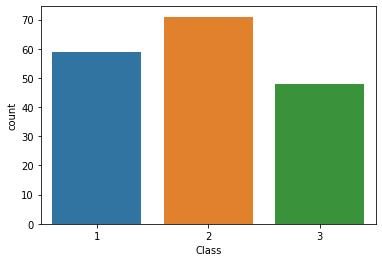

In [13]:
import seaborn as sns
sns.countplot(x='Class',data=data)

<AxesSubplot:>

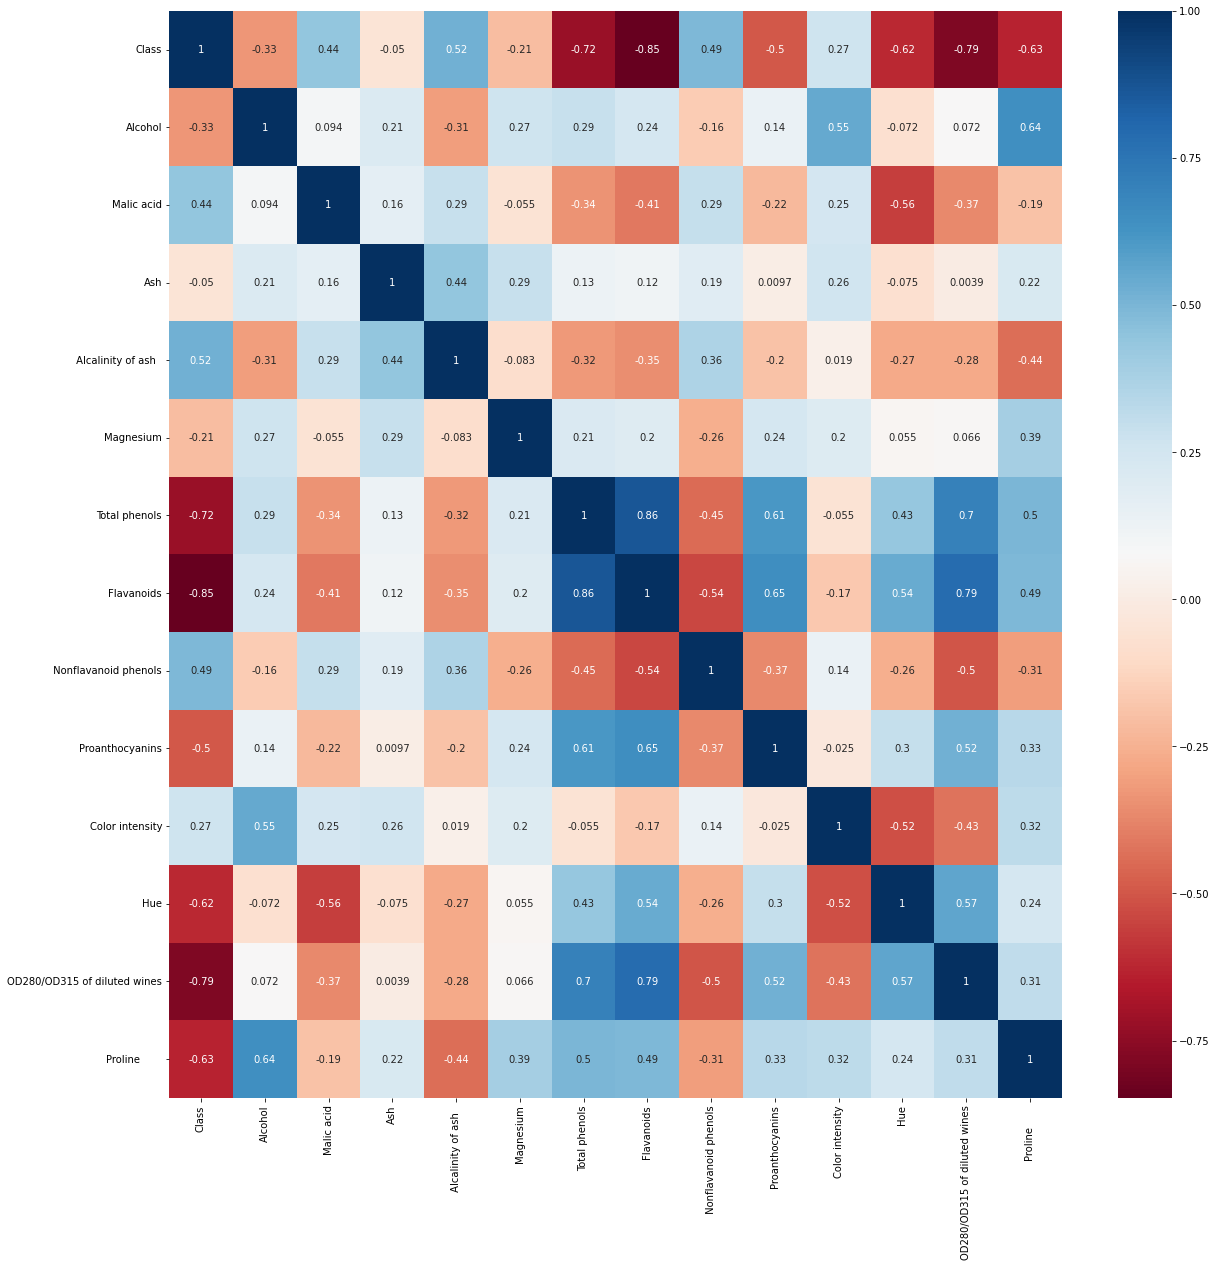

In [14]:
import matplotlib.pyplot as plt
# Heatmap
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='RdBu')

## **Unsupervised Clustering: kMeans**

In [15]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# we leave out the labels of the dataset 
X = data.drop("Class", axis=1)

# calculating inertia for different k values
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

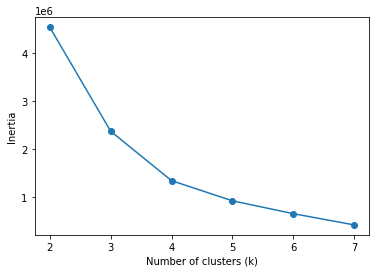

In [16]:
# plotting the inertia values against k values
plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

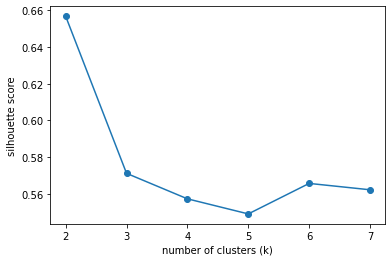

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

# silhouette score calc for each value of k
silhouette_scores = []
inertia2 = []

# I tried calculating inertia with the same instances as the silhouette score 
# because I wasn't sure if having the same random state for kmeans would yield the same
# results for every k but that seems to be the case
for n_clusters in range(2, 8):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia2.append(clusterer.inertia_)

# plotting silhouette scores against k values
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('silhouette score')
plt.show()


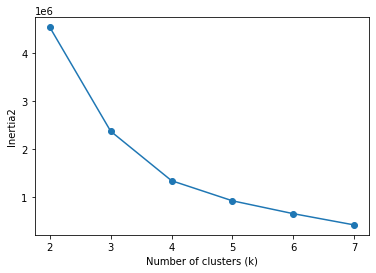

In [20]:
# plotting the inertia values against k values
plt.plot(range(2, 8), inertia2, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia2')
plt.show()

Η μετρική inertia αξιολογεί την επίδοση αλγορίθμων clustering, μετρώντας το άθροισμα του των τετραγώνων των αποστάσεων όλων των δεδομένων ενός cluster, ως προς το κέντρο του. Ελαχιστοποιώντας την inertia, o kMeans δύναται να βελτιστοποιήσει την θέση των κέντρων κάθε cluster. Μέσω της μετρικής αυτής, λοιπόν, δοκιμάζοντας διαφορετικούς αριθμούς clusters, k, μπορούμε να επιλέξουμε τον optimal αριθμό cluster. Εδώ, τα υποψήφια σημεία που φαίνεται να έχουν την χαμηλότερη τιμή, χωρίς να υπάρχει μεγάλη διαφορά με την αύξηση του αριθμού clusters, δηλαδή τα υποψήφια elbow points, είναι για τις τιμές k=3, 4. Με λιγότερους clusters κινδυνεύουμε από underfitting και με περισσότερους από overfitting.



Όσον αφορά το silhouette score, αποτελεί μετρική για την αξιολόγηση της ποιότητας του clustering. Συγκεκριμένα, η μετρική αυτή ποσοτικοποιεί πόσο όμοια είναι ένα δεδομένο με το cluster στο οποίο ανήκει, σε σύγκριση με την ομοιότητα του δεδομένου αυτού με τα υπόλοιπα clusters. Οπότε, θέλουμε μεγιστοποίση της μετρικής αυτής που φαίνεται να συμβαίνει για την τιμή 2, αλλά εκεί έχουμε και υψηλή inertia. Ακολουθούν τα k=3, 6 με τις επόμενες καλύτερες τιμές.

## Συμπεράσματα

Παρατηρώ ότι τα διαγράμματα για τα διάφορα k του silhouette score και της inertia δεν συμφωνούν. Αν συμφωνούσαν θα διαλέγαμε το elbow point k που μεγιστοποιεί το silhouette score και ελαχιστοποιεί την inertia. Εδώ, πρέπει να υπάρξει ένα trade off. Διαλέγω την τιμή k=3 γιατί αποτελεί ένα από τα δύο υποψήφια elbow points, ενώ ταυτόχρονα παρουσιάζει το 2ο μεγαλύτερο silhouette score. Η επιλογή εξηγείται και με την λογική, καθώς το dataset περιέχει τρία είδη κρασιών. Δεύτερη επιλογή θα ήταν τα 6 clusters, που είναι πολλαπλάσιο των 3 ειδών κρασιών και όντως εμφανίζει καλό συνδυαστικό αποτέλεσμα των δύο μετρικών, αλλά ελοχεύει ο κίνδυνος του overfitting και τελικά με βάση την συνολική συλλογιστική, οι 3 clusters αναδεικνύονται οι βέλτιστοι.